In [1]:
import os
import time
import uuid
import cv2


In [2]:
#Specify the path to the images
IMAGES_PATH = os.path.join('data', 'images')
images_number = 30

In [6]:
# Collecting the actual images
cap = cv2.VideoCapture(0)
for imgnum in range(images_number):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
!labelme

^C


In [3]:
#Review Dataset and Build Image Loading Function
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Limit GPU Memory Growth
#Avoiding OOM errors by setting the GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
print(tf.config.list_physical_devices('GPU'))

[]


In [6]:
# Load Image into to TF Data Pipeline

images = tf.data.Dataset.list_files('data\\images\\*.jpg')

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [50]:
images.as_numpy_iterator().next()

b'data\\images\\212d1ad8-d6a9-11ef-9d1c-047c163d1efe.jpg'

In [22]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [52]:
images = images.map(load_image)

In [53]:
images.as_numpy_iterator().next()

array([[[ 83,  94,  90],
        [ 81,  92,  88],
        [ 79,  90,  84],
        ...,
        [ 95, 111, 108],
        [ 93, 109, 108],
        [ 89, 108, 106]],

       [[ 81,  92,  88],
        [ 80,  91,  87],
        [ 78,  89,  85],
        ...,
        [ 95, 111, 108],
        [ 95, 111, 110],
        [ 92, 111, 109]],

       [[ 83,  92,  91],
        [ 81,  90,  89],
        [ 79,  89,  88],
        ...,
        [ 95, 112, 106],
        [ 96, 112, 109],
        [ 93, 112, 108]],

       ...,

       [[ 83, 103, 104],
        [ 82, 102, 101],
        [ 83, 101, 101],
        ...,
        [ 63,  68,  62],
        [ 68,  70,  65],
        [ 64,  66,  61]],

       [[ 82, 101, 105],
        [ 82, 102, 103],
        [ 84, 102, 104],
        ...,
        [ 66,  71,  65],
        [ 73,  76,  69],
        [ 67,  70,  63]],

       [[ 82, 101, 105],
        [ 82, 101, 105],
        [ 84, 102, 104],
        ...,
        [ 71,  76,  70],
        [ 73,  76,  69],
        [ 73,  76,  69]]

In [54]:
#View Raw Images with Matplotlib
image_generator = images.batch(4).as_numpy_iterator()

In [78]:
plot_images = image_generator.next()

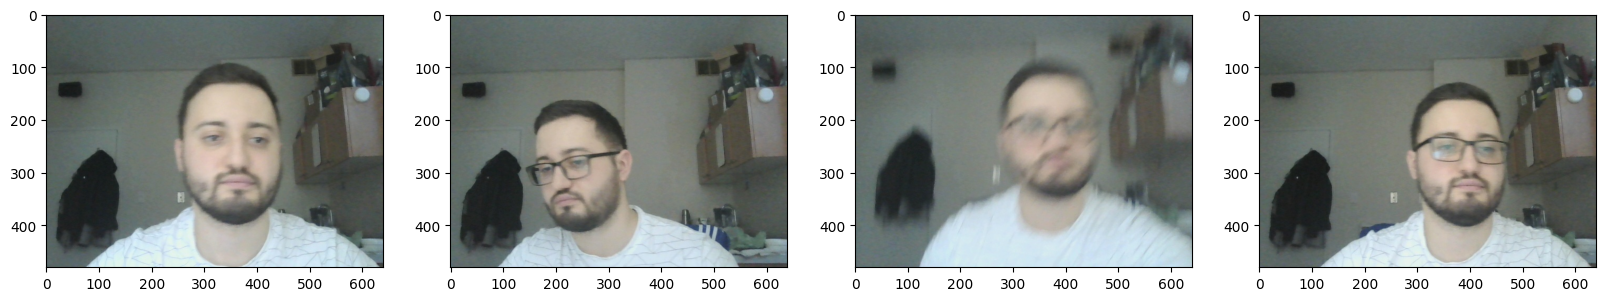

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()    

### Partition Unaugmented Data

MANUALLY SPLIT DATA INTO TRAIN TEST AND VAL

In [ ]:
# 83 to train
# 19 and 18 to test and val respectively

Move the matching Labels

In [80]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

### Apply Image Augmentation on Images and Labels using Albumentations

In [7]:
import albumentations as alb

In [9]:
# Augmentation Pipeline
augmentor = alb.Compose([
                        alb.RandomCrop(width=450, height=450),
                        alb.HorizontalFlip(p=0.5), alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2), alb.RGBShift(p=0.2), alb.VerticalFlip(p=0.5)
                        ],
                        bbox_params=alb.BboxParams(format='albumentations', 
                        label_fields=['class_labels']))

c:\Users\teimu\OneDrive - George Brown College\Desktop\GBC Assignments\Semester 6\face_detection_model\.venv\Lib\site-packages\pydantic\main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [10]:
img = cv2.imread(os.path.join('data', 'train', 'images', '1a19b496-d6a9-11ef-85da-047c163d1efe.jpg'))
print(img)

[[[104 101  97]
  [103 100  96]
  [101 100  96]
  ...
  [120 121 112]
  [122 119 111]
  [121 118 110]]

 [[104 101  97]
  [101 100  96]
  [101 100  96]
  ...
  [117 118 109]
  [120 117 109]
  [119 117 107]]

 [[102 100  99]
  [ 99 100  98]
  [ 98  99  97]
  ...
  [116 117 107]
  [119 117 107]
  [119 117 106]]

 ...

 [[110 107  99]
  [110 107  99]
  [110 107  99]
  ...
  [ 68  69  67]
  [ 71  69  69]
  [ 70  68  67]]

 [[112 107  98]
  [112 107  98]
  [112 107  98]
  ...
  [ 72  73  69]
  [ 73  71  70]
  [ 72  71  67]]

 [[111 106  97]
  [112 107  98]
  [113 108  99]
  ...
  [ 71  72  68]
  [ 74  73  69]
  [ 77  76  72]]]


In [11]:
# Load the annotation
import json
with open(os.path.join('data', 'train', 'labels', '1a19b496-d6a9-11ef-85da-047c163d1efe.json'), 'r') as f:
    label = json.load(f)

In [12]:
label

{'version': '5.6.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[306.98924731182797, 184.89247311827958],
    [459.13978494623655, 394.5698924731183]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\1a19b496-d6a9-11ef-85da-047c163d1efe.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAV

Extract Coordinates and Rescale to Match Image Resolution

In [13]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [14]:
coords

[306.98924731182797, 184.89247311827958, 459.13978494623655, 394.5698924731183]

In [15]:
# Divide the coordinates by the width and height of the image
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [16]:
coords

[np.float64(0.4796706989247312),
 np.float64(0.38519265232974914),
 np.float64(0.7174059139784946),
 np.float64(0.8220206093189965)]

Apply Augmentations and View Results

In [17]:
augmented_result = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [18]:
augmented_result['image'].shape

(450, 450, 3)

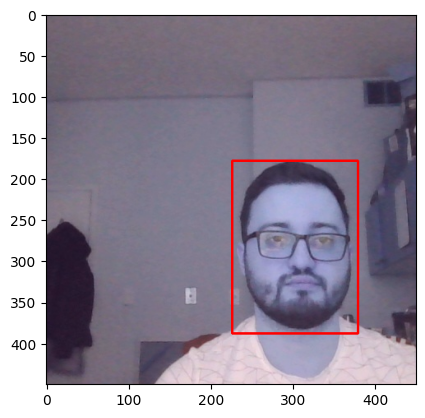

In [19]:
import matplotlib.pyplot as plt
cv2.rectangle(augmented_result['image'],
              tuple(np.multiply(augmented_result['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented_result['bboxes'][0][2:], [450, 450]).astype(int)),
              (255, 0, 0),
              2
              )
plt.imshow(augmented_result['image'])

Run Augmentation Pipeline

In [20]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]    
            coords = list(np.divide(coords, [640, 480, 640, 480]))
            
        try:
               for x in range(60):
                   augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                   cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                   
                   annotation = {}
                   annotation['image'] = image
                   
                   if os.path.exists(label_path):
                       if len(augmented['bboxes']) == 0:
                           annotation['bbox'] = [0, 0, 0, 0]
                           annotation['class'] = 0
                       else:
                           annotation['bbox'] = augmented['bboxes'][0]
                           annotation['class'] = 1
                           
                   else:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    
                   with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
        except Exception as e:
            print(e)                               

Load Augmented Images to Tensorflow Dataset

We resize the images, since it can improve the effectivness of the NN

In [23]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255) # scaling the images

In [24]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [25]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [26]:
train_images.as_numpy_iterator().next()

array([[[0.41023284, 0.44307598, 0.44650736],
        [0.40637255, 0.44558823, 0.44656864],
        [0.41127452, 0.4504902 , 0.45147058],
        ...,
        [0.36292893, 0.4021446 , 0.40251225],
        [0.34773284, 0.40655637, 0.3918505 ],
        [0.3313113 , 0.3939951 , 0.3747549 ]],

       [[0.4057598 , 0.44105393, 0.43713236],
        [0.41317403, 0.45196077, 0.4480392 ],
        [0.41525736, 0.45447305, 0.45055148],
        ...,
        [0.36819854, 0.40349266, 0.39270833],
        [0.3465686 , 0.39362746, 0.37892157],
        [0.33382353, 0.40030637, 0.37732843]],

       [[0.40704656, 0.4384191 , 0.44626224],
        [0.41525736, 0.4466299 , 0.45490196],
        [0.41237745, 0.44375   , 0.45159313],
        ...,
        [0.37156862, 0.40294117, 0.4107843 ],
        [0.35477942, 0.39742646, 0.40520832],
        [0.35226715, 0.39246324, 0.39656863]],

       ...,

       [[0.78811276, 0.83909315, 0.8704657 ],
        [0.7891544 , 0.8401348 , 0.87052697],
        [0.78615195, 0

### Prepare Labels

In [27]:
#Load the labels
import json
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']    

In [28]:
#Load labels to TF Dataset
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [30]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.004562, 0.3855  , 0.4204  , 0.878   ], dtype=float16))

Check partitions length

In [32]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels),

(4980, 4980, 1140, 1140, 1080, 1080)

Create Final Datasets (Images/Labels)

In [33]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5500)
train = train.batch(8)
train = train.prefetch(4)

In [34]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1500)
test = test.batch(8)
test = test.prefetch(4)

In [35]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1200)
val = val.batch(8)
val = val.prefetch(4)

In [36]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.366  , 0.2186 , 0.8296 , 0.852  ],
        [0.519  , 0.1643 , 1.     , 0.8047 ],
        [0.527  , 0.0654 , 1.     , 0.7275 ],
        [0.277  , 0.03436, 0.6855 , 0.5913 ],
        [0.     , 0.10486, 0.5654 , 0.855  ],
        [0.     , 0.565  , 0.3328 , 1.     ],
        [0.     , 0.1526 , 0.4724 , 0.9365 ],
        [0.     , 0.     , 0.387  , 0.538  ]], dtype=float16))

View Images and Annotations

In [37]:
data_samples = train.as_numpy_iterator()


In [40]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


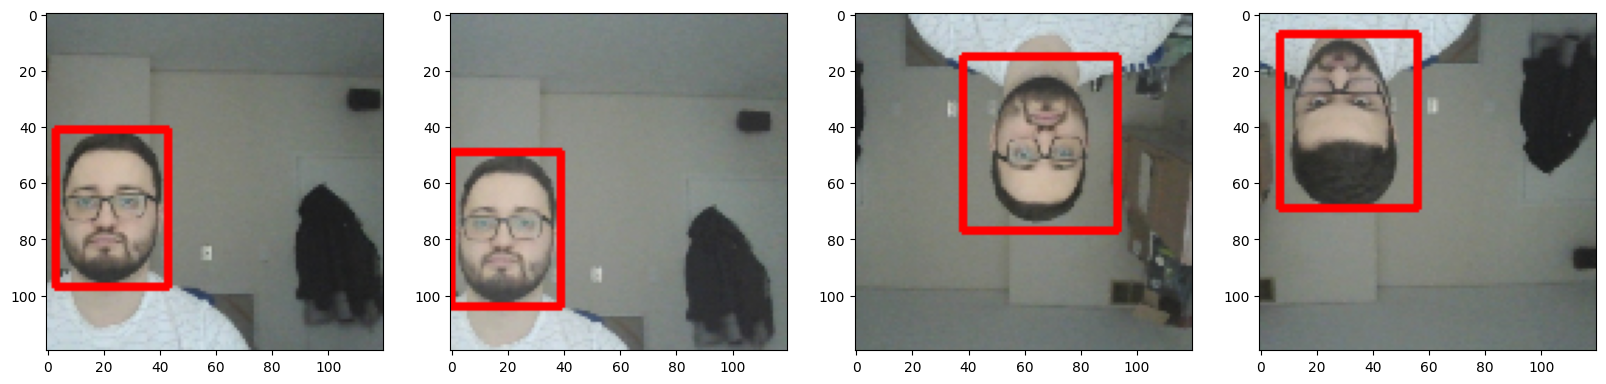

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                 tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                 tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                 (255, 0, 0), 2 
                  )
    
    ax[idx].imshow(sample_image)
    
plt.show()

### Build Deep Learning using Functional API

Import Layers and Base Network

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16


Download VGG16

In [47]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [48]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Build instance of Network

In [50]:
 
def build_model():
    input_layer = Input(shape=(120, 120, 3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding Box Model
    f2 = GlobalMaxPooling2D()(vgg)
    regression1 = Dense(2048, activation='relu')(f2)
    regression2 = Dense(4, activation='sigmoid')(regression1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regression2])
    return facetracker

In [49]:
#check the outputs format
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2512 , 0.1337 , 0.846  , 0.8984 ],
        [0.     , 0.165  , 0.5723 , 0.932  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.1907 , 0.1307 , 0.776  , 0.905  ],
        [0.     , 0.06616, 0.5933 , 0.8237 ],
        [0.     , 0.3745 , 0.2059 , 0.907  ],
        [0.5674 , 0.1448 , 0.94   , 0.5967 ],
        [0.4856 , 0.1466 , 0.9897 , 0.787  ]], dtype=float16))

In [51]:
facetraker = build_model()

In [52]:
facetraker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
X, y = train.as_numpy_iterator().next()

In [54]:
X.shape

(8, 120, 120, 3)

In [55]:
classes, coords = facetraker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


In [56]:
classes, coords

(array([[0.6059223],
        [0.6356802],
        [0.571997 ],
        [0.5244757],
        [0.6284535],
        [0.6465119],
        [0.5989508],
        [0.5594255]], dtype=float32),
 array([[0.41583404, 0.57326484, 0.4874752 , 0.5631605 ],
        [0.47913456, 0.48390067, 0.4986306 , 0.5231707 ],
        [0.4077996 , 0.554495  , 0.48413455, 0.5816599 ],
        [0.513808  , 0.5073767 , 0.4225408 , 0.5767977 ],
        [0.43709096, 0.4829197 , 0.53162616, 0.56754065],
        [0.51266277, 0.49037087, 0.47979006, 0.51990986],
        [0.44198647, 0.4536846 , 0.5360882 , 0.48472723],
        [0.45988846, 0.51685196, 0.44941437, 0.60494506]], dtype=float32))

### Define Losses and Optimizers

In [59]:
# Trying to slow the training process, so we don't overfit and blow our model
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [66]:
# Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

c:\Users\teimu\OneDrive - George Brown College\Desktop\GBC Assignments\Semester 6\face_detection_model\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Create Localization Loss and Classification Loss

In [60]:
def localization_loss(y_true, yhat):
    # Calculating first and second coordinate 
    # (it performs the calcualtions on x and y at the same time on both coordinates)
    # Then it squares the difference
    # Eventually it reduces the sum (that means, we are summing it all back up together) 
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    
    # Actual height and width of the Box
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    # Predicted height and width of the Box
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    # Gives us the result of localization loss
    return delta_coord + delta_size

In [63]:
class_loss = tf.keras.losses.BinaryCrossentropy()
regression_loss = localization_loss

Test out Loss Metrics

In [62]:
localization_loss(y[1], coords).numpy()

np.float32(6.0778456)

In [64]:
class_loss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.519014835357666>

In [65]:
regression_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.077845573425293>

### Train Neural Network

Create Custom Model Class

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker
        
    def compile(self, opt, class_loss, localization_loss, **kwargs):
        super().compile(**kwargs)
        self.closs = class_loss
        self.lloss = localization_loss
        self.opt = opt
        
    def train_step(self, batch, **kwargs):
        
        X, y = batch
        
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss + 0.5 * batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)  
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}          